In [4]:
import numpy as np
import os
from tqdm import tqdm
from shutil import copyfile

In [6]:
data_dir = '/DATA1/ziang/data/guangdong26/dataset/audio/'
dest_dir = '/home/ziangzhou/github/econ211_final/data/'

In [7]:
all_birds = os.listdir(data_dir)

In [9]:
LIMIT = 10

if not os.path.isdir(dest_dir):
    os.mkdir(dest_dir)
    
for bird in all_birds:
    bird_all_segs = [data_dir + bird + '/' + x for x in os.listdir(data_dir + bird)]
    if not os.path.isdir(dest_dir+bird):
        os.mkdir(dest_dir+bird)
    for song in tqdm(bird_all_segs[:LIMIT],desc=bird):
        copyfile(song, song.replace(data_dir,dest_dir))


Red-whiskeredBulbul: 100%|██████████| 10/10 [00:00<00:00, 166.40it/s]

ChestnutBulbul: 100%|██████████| 10/10 [00:00<00:00, 204.02it/s]

Red-rumpedSwallow: 100%|██████████| 10/10 [00:00<00:00, 580.74it/s]

Scaly-breastedMunia: 100%|██████████| 10/10 [00:00<00:00, 382.59it/s]

DuskyWarbler: 100%|██████████| 10/10 [00:00<00:00, 154.65it/s]

Yellow-belliedPrinia: 100%|██████████| 10/10 [00:00<00:00, 164.20it/s]

Black-collaredStarling: 100%|██████████| 10/10 [00:00<00:00, 411.58it/s]

Richard'sPipit: 100%|██████████| 10/10 [00:00<00:00, 347.84it/s]

Red-billedStarling: 100%|██████████| 10/10 [00:00<00:00, 263.19it/s]

AfricanStonechat: 100%|██████████| 10/10 [00:00<00:00, 378.44it/s]

WarblingWhite-eye: 100%|██████████| 10/10 [00:00<00:00, 306.16it/s]

PlainPrinia: 100%|██████████| 10/10 [00:00<00:00, 200.58it/s]

Light-ventedBulbul: 100%|██████████| 10/10 [00:00<00:00, 147.81it/s]

CrestedMyna: 100%|██████████| 10/10 [00:00<00:00, 454.12it/s]

Sooty-headedBulbul: 100%|██████████| 10/10 

## Data Visualizations

Since we our training model accepts fixed-length of audio as training data, we want to visualize the total audio length for each bird

In [10]:
import sox
data_stats = {bird:sum([sox.file_info.duration(dest_dir+bird+'/'+x) for x in os.listdir(dest_dir+bird)]) for bird in all_birds}

In [14]:
data_stats = {k: v for k, v in sorted(data_stats.items(), key=lambda item: item[1], reverse=True)}

In [15]:
data_stats

{'turdus_merula': 2185.8689930000005,
 'hirundo_rustica': 1193.4330160000002,
 'passer_montanus': 869.9809890000001,
 'Light-ventedBulbul': 681.878009,
 'Red-whiskeredBulbul': 550.914007,
 'Sooty-headedBulbul': 511.03197200000005,
 'DuskyWarbler': 493.841997,
 'ChestnutBulbul': 471.82199099999997,
 'PlainPrinia': 426.918984,
 'WhiteWagtail': 404.967014,
 'Yellow-belliedPrinia': 390.59802200000007,
 'CommonTailorbird': 379.052006,
 'EurasianTreeSparrow': 375.478013,
 'Red-billedStarling': 317.556017,
 'Black-wingedKite': 280.019019,
 'SpottedDove': 275.51101600000004,
 'WarblingWhite-eye': 269.470009,
 'AfricanStonechat': 233.646031,
 'MaskedLaughingthrush': 226.34400000000005,
 'Black-collaredStarling': 219.972011,
 'Scaly-breastedMunia': 203.39601100000002,
 'CrestedMyna': 201.31001400000002,
 'White-rumpedMunia': 189.10903399999998,
 'Red-rumpedSwallow': 188.38301500000003,
 "Richard'sPipit": 170.152011,
 'ChinesePondHeron': 67.882012}

In [17]:
list(data_stats.values())

dict_values([2185.8689930000005, 1193.4330160000002, 869.9809890000001, 681.878009, 550.914007, 511.03197200000005, 493.841997, 471.82199099999997, 426.918984, 404.967014, 390.59802200000007, 379.052006, 375.478013, 317.556017, 280.019019, 275.51101600000004, 269.470009, 233.646031, 226.34400000000005, 219.972011, 203.39601100000002, 201.31001400000002, 189.10903399999998, 188.38301500000003, 170.152011, 67.882012])

In [24]:
ax.barh?

Signature: ax.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
Docstring:
Make a horizontal bar plot.

The bars are positioned at *y* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The horizontal baseline
is *left* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
y : float or array-like
    The y coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

width : float or array-like
    The width(s) of the bars.

height : float or array-like, default: 0.8
    The heights of the bars.

left : float or array-like, default: 0
    The x coordinates of the left sides of the bars.

align : {'center', 'edge'}, default: 'center'
    Alignment of the base to the *y* coordinates*:

    - 'center': Center the bars on the *y* positions.
    - 'edge': Align the bottom edges of the bars with the *y*
      positions

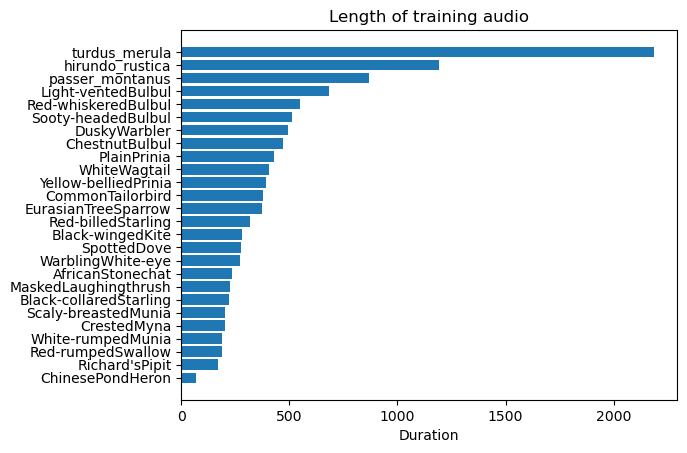

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(20000518)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
birds = list(data_stats.keys())
y_pos = np.arange(len(birds))
duration = list(data_stats.values())
# error = np.random.rand(len(birds))

ax.barh(y_pos, duration,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(birds)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Duration')
ax.set_title('Length of training audio')

plt.show()